# <font color=orange> Particle Swarm Optimization, PSO</font> 
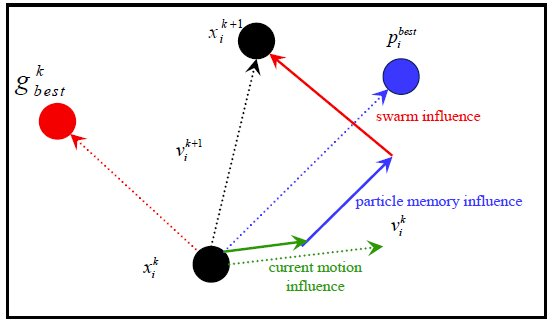

#### source: Al-Shamma, Basil R., Gosselin, Olivier , and Peter R. King. "History Matching Using Hybrid Parameterisation and Optimisation Methods." Paper presented at the SPE Europec featured at 80th EAGE Conference and Exhibition, Copenhagen, Denmark, June 2018.


# <font color=Blue> Continuous PSO Example 
# Finding the largest value for the following function

## $ f(x)=-x^2 + 20x +10 $
## $ 0 \leq X \leq 20 $

## Step 1: Visulize the Problem

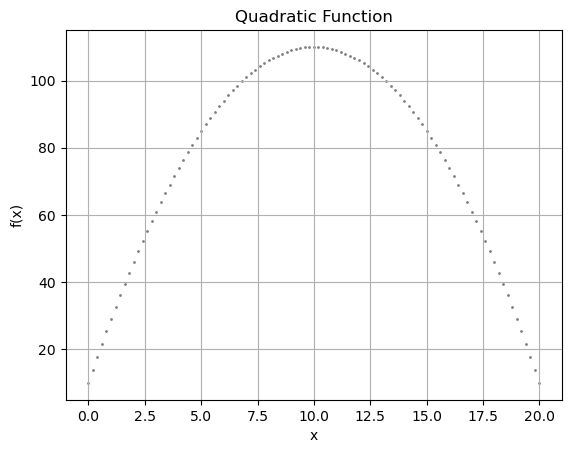

In [3]:
import matplotlib.pyplot as plt
# define the function
def function(x):
    return -x**2 + 20*x + 10

def show():
    
    # Generate all x and f(x)
    x = [x*0.1 for x in range(0,201,2) ] 
    y= [function(i) for i in x]
    
    # Visulize the function
    plt.scatter(x, y,s=1, c='gray')
    plt.xlabel('x')
    plt.ylabel('f(x)')
    plt.title('Quadratic Function')
    plt.grid(True)
    
show()

## Step 2: Design PSO Function
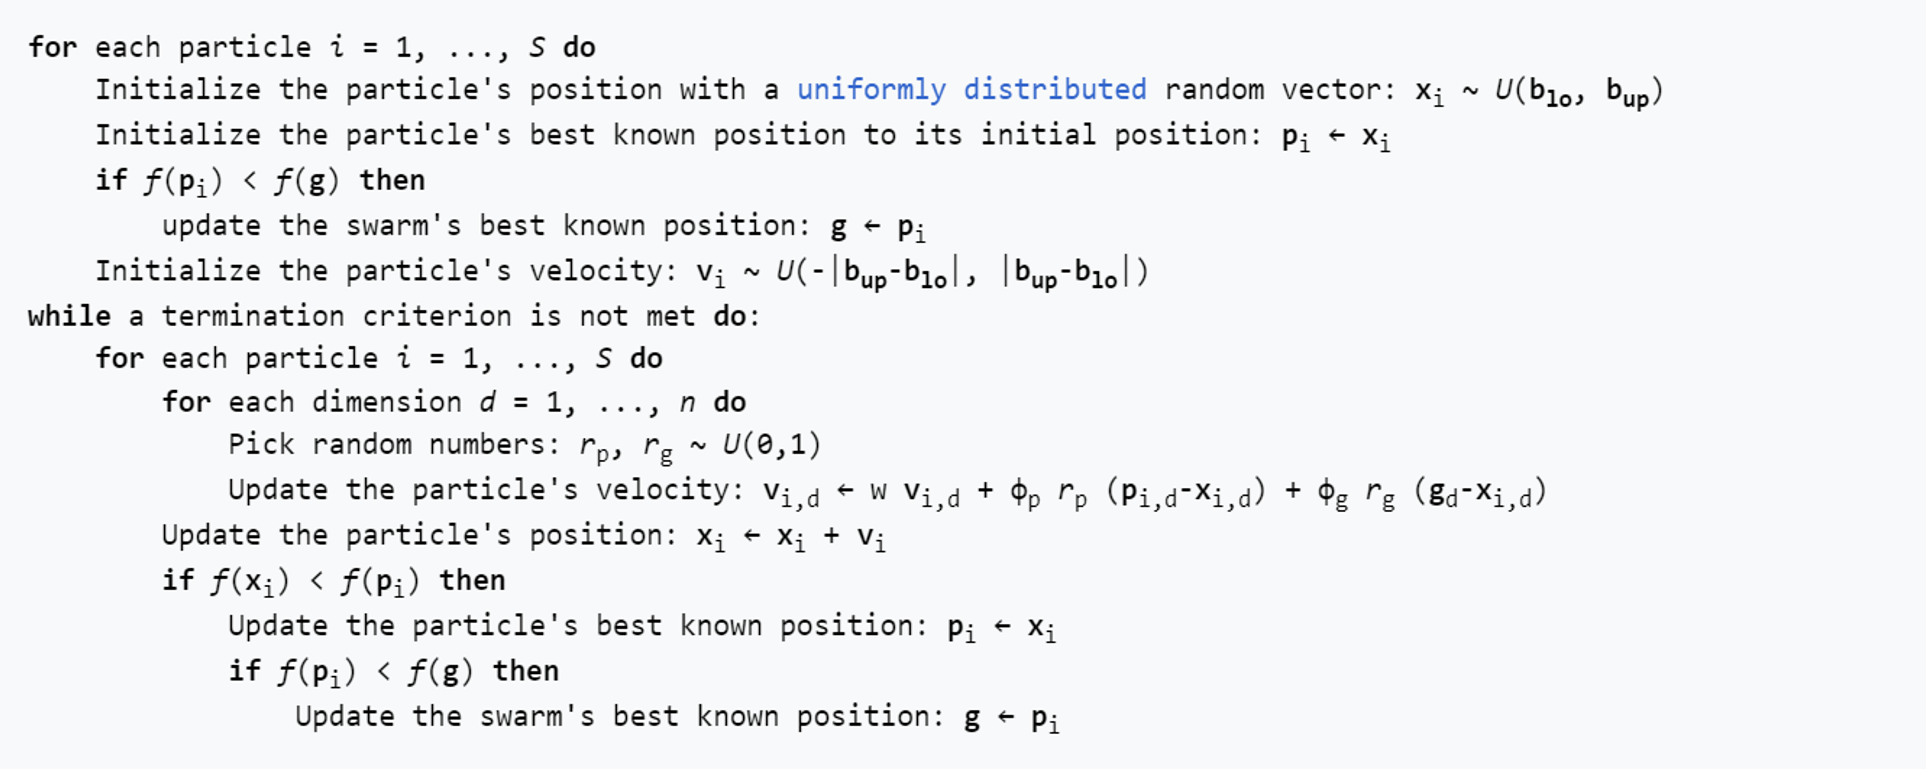
#### source: https://en.wikipedia.org/wiki/Particle_swarm_optimization
## $ v_{i+1} = w.v_i+c_p. rand(). (p_i-x_i)+c_g.rand().(p_g-x_i) $ 
## $ x_{i+1} = x_i+v_{i+1} $

x before update: [19.12068543778499, 1.1310273545361738, 16.709977562588993]
1 round ===========================
v: [1.6197395083381476, 11.842798164483114, -1.6124221419529952]
x: [20, 12.973825519019288, 15.097555420635997]
p_best: [19.12068543778499, 12.973825519019288, 15.097555420635997]
g_best: 12.973825519019288


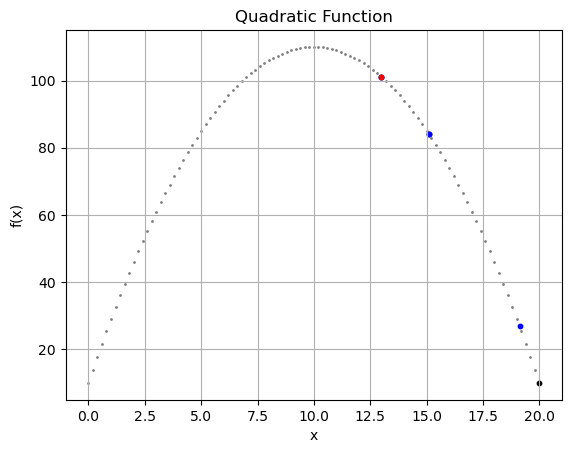

x before update: [20, 12.973825519019288, 15.097555420635997]
2 round ===========================
v: [-6.593500041441824, 9.592666513231322, -3.4297918365986355]
x: [13.406499958558175, 20, 11.667763584037361]
p_best: [13.406499958558175, 12.973825519019288, 11.667763584037361]
g_best: 11.667763584037361


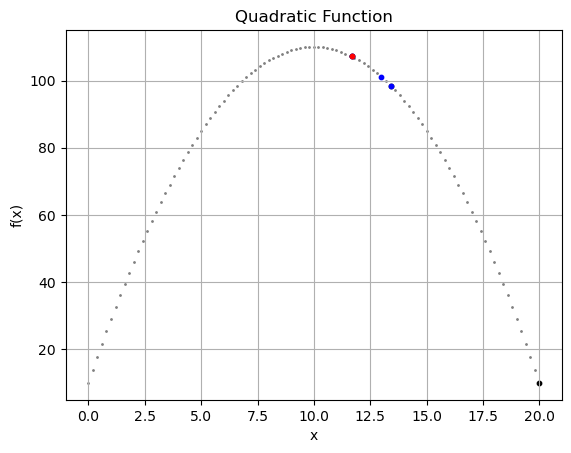

x before update: [13.406499958558175, 20, 11.667763584037361]
3 round ===========================
v: [-6.545397904731904, -8.365357008797716, -2.533438841715483]
x: [6.861102053826271, 11.634642991202284, 9.134324742321878]
p_best: [6.861102053826271, 11.634642991202284, 9.134324742321878]
g_best: 9.134324742321878


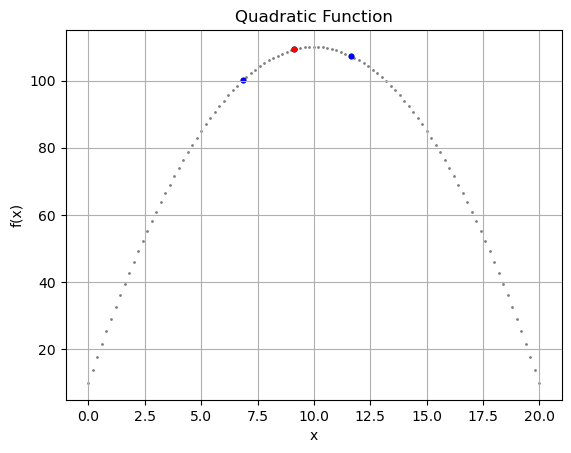

x before update: [6.861102053826271, 11.634642991202284, 9.134324742321878]
4 round ===========================
v: [-2.0212128767989954, -7.9888289823525875, -1.6621892240495284]
x: [4.839889177027276, 3.6458140088496966, 7.472135518272349]
p_best: [6.861102053826271, 11.634642991202284, 9.134324742321878]
g_best: 9.134324742321878


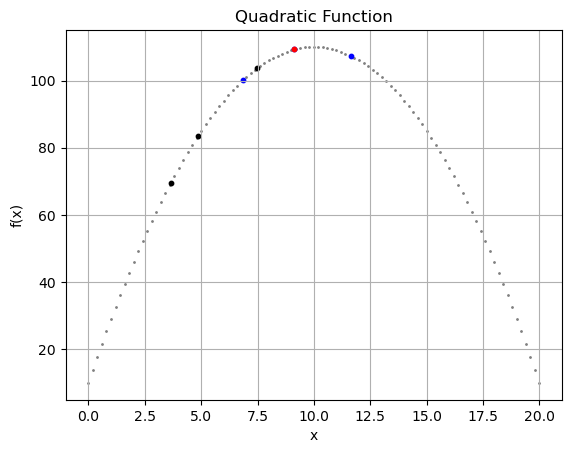

x before update: [4.839889177027276, 3.6458140088496966, 7.472135518272349]
5 round ===========================
v: [5.122142450472559, 9.587722975213346, 3.170579218368008]
x: [9.962031627499835, 13.233536984063043, 10.642714736640357]
p_best: [9.962031627499835, 11.634642991202284, 10.642714736640357]
g_best: 9.962031627499835


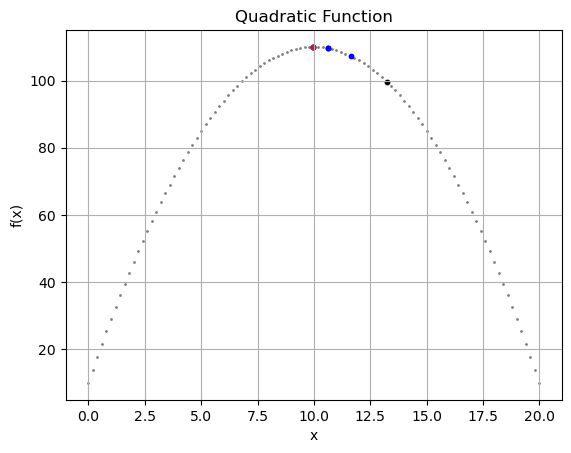

(9.96, 110.0)

In [2]:
import random as rd 
import matplotlib.pyplot as plt

rd.seed(2)

#number of particles
particles = 3

# termination criterion
max_iterations = 5

def function(x):
    return -x**2 + 20*x + 10

def pso(particles,max_iterations):

    #parameters
    #set weights for 1.inertia  2.memory influence 3.social influence
    w = 0.9 # inertia weight
    cp = 1 # memory influence weight
    cg = 1 # social influence weight

    #create 4 lists for saving x(location), v(velocity), p_best(each particle's best location), p_best_value(each particle's best f(x) value)
    x=[] #location
    v=[] #velocity
    p_best=[] #each particle's best location
    p_best_value=[] #each particle's best f(x) value
    
    #set an initial value () to g_best and g_best_value
    g_best=0
    g_best_value=function(0)
    
    #set initial x(location), v(velocity), p_best(each particle's best location), p_best_value(each particle's best f(x) value)
    for i in range (particles):
        x.append(rd.uniform(0,20))
        v.append(rd.uniform(-5,5))
        p_best.append(x[i])  
        p_best_value.append(function(x[i]))
        
        #update g_best and g_best_value based on initial x
        
        if function(x[i]) > g_best_value:
            g_best = x[i]
            g_best_value = function(x[i])
    
    
    #POS function
    iteration=0    
    while iteration < max_iterations: #repeat max_iterations times 
        iteration+=1 
        
        print('x before update:',x)
        for i in range(particles):
            v[i] = (w**iteration)*v[i] + cp*(p_best[i]-x[i]) + cg*(g_best-x[i])
            x[i] = x[i]+v[i]
            
            if x[i]<0: 
                x[i]=0
            elif x[i]>20: 
                x[i]=20
                        
            temp = function(x[i])
            if temp > p_best_value[i]:
                p_best[i] = x[i]
                p_best_value[i] = temp
                
                if temp > g_best_value:
                    g_best = x[i]
                    g_best_value = temp
                    
        # Visulize the process       
        print(iteration,"round ===========================")
        print('v:',v)
        print('x:',x)
        print('p_best:',p_best)    
        print('g_best:',g_best)   
        
        show()
        plt.scatter(x, [function(i) for i in x],s=10, c='black')
        plt.scatter(p_best, [function(i) for i in p_best],s=10, c='blue')        
        plt.scatter(g_best, g_best_value,s=10, c='red')


        plt.show()    
    return (round(g_best,2), round(g_best_value,2))
                               
pso(particles,max_iterations)

                


# <font color=Blue> In-Calss exercise (50 points): </font>

# Finding the highest and lowest values for the following function

## $ f(x)=-x + 2sin(5x) +6cos(4x) $
## $ 0 \leq X \leq 30 $

x before update: [25.332655545751443, 12.61714742492535, 15.338241641058255, 23.51395767104318, 14.297908624570674]
1 round ===========================
v: [0.9286358505850889, 11.411829875324733, 9.48850767457194, 1.7645261666481553, 11.067219836627386]
x: [26.26129139633653, 24.028977300250084, 24.826749315630195, 25.278483837691336, 25.36512846119806]
p_best: [26.26129139633653, 12.61714742492535, 15.338241641058255, 23.51395767104318, 14.297908624570674]
g_best: 26.26129139633653


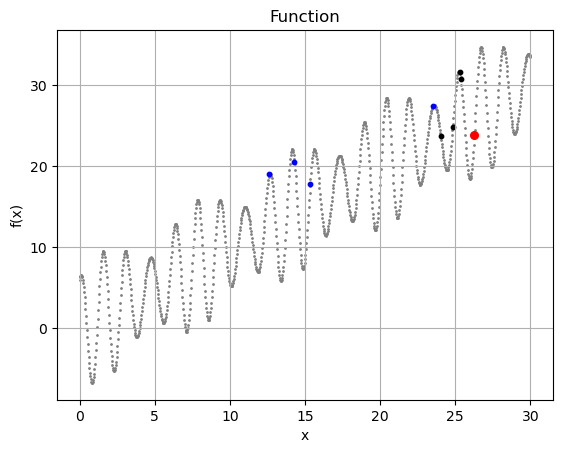

x before update: [26.26129139633653, 24.028977300250084, 24.826749315630195, 25.278483837691336, 25.36512846119806]
2 round ===========================
v: [0.752195038973922, 0.9820179976985748, 0.43712218192422747, 0.7257194477823407, -0.42088244344841286]
x: [27.013486435310455, 25.010995297948657, 25.263871497554423, 26.004203285473675, 24.94424601774965]
p_best: [26.26129139633653, 12.61714742492535, 15.338241641058255, 26.004203285473675, 14.297908624570674]
g_best: 26.004203285473675


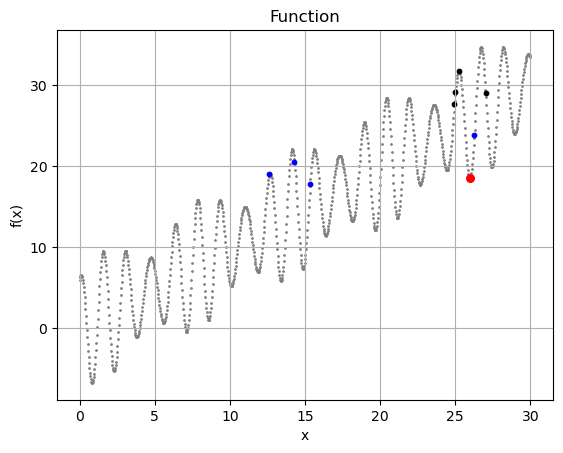

x before update: [27.013486435310455, 25.010995297948657, 25.263871497554423, 26.004203285473675, 24.94424601774965]
3 round ===========================
v: [-1.036980186517643, -9.569612109638975, -7.973033524109237, 0.50412214442055, -8.959492747196123]
x: [25.976506248792813, 15.441383188309683, 17.290837973445186, 26.508325429894224, 15.984753270553526]
p_best: [25.976506248792813, 12.61714742492535, 15.338241641058255, 26.004203285473675, 15.984753270553526]
g_best: 15.984753270553526


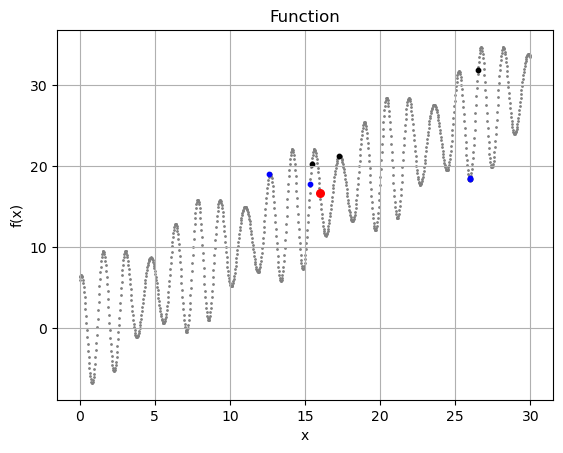

x before update: [25.976506248792813, 15.441383188309683, 17.290837973445186, 26.508325429894224, 15.984753270553526]
4 round ===========================
v: [-9.672940380789584, -8.044470280455839, -15.892976553348515, -17.323226660860517, -13.60737951786509]
x: [16.30356586800323, 7.396912907853844, 1.397861420096671, 9.185098769033708, 2.3773737526884364]
p_best: [16.30356586800323, 7.396912907853844, 1.397861420096671, 9.185098769033708, 2.3773737526884364]
g_best: 2.3773737526884364


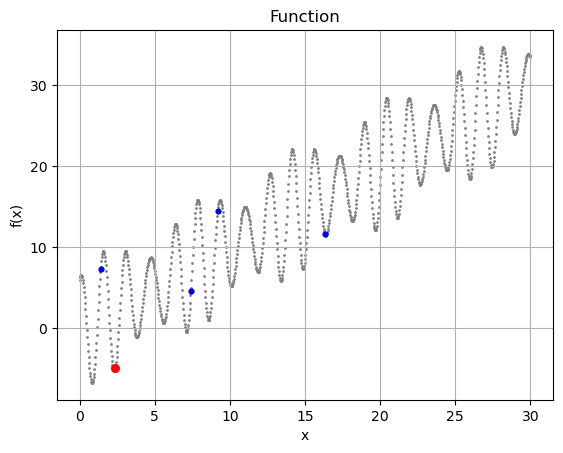

x before update: [16.30356586800323, 7.396912907853844, 1.397861420096671, 9.185098769033708, 2.3773737526884364]
5 round ===========================
v: [-18.245347469235757, -9.267764495555236, -8.503082625654176, -16.356144625682273, -8.035021531504158]
x: [0, 0, 0, 0, 0]
p_best: [0, 7.396912907853844, 0, 0, 2.3773737526884364]
g_best: 2.3773737526884364


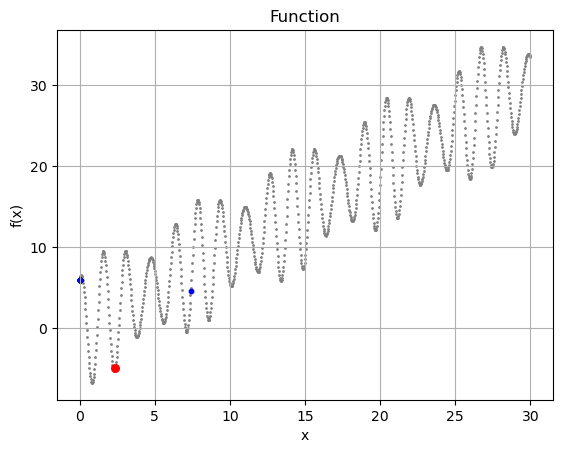

x before update: [0, 0, 0, 0, 0]
6 round ===========================
v: [-7.556689326978527, 3.871587963205682, -2.3792503562406893, -6.55268947859762, 0.009132877115083815]
x: [0, 3.871587963205682, 0, 0, 0.009132877115083815]
p_best: [0, 3.871587963205682, 0, 0, 2.3773737526884364]
g_best: 2.3773737526884364


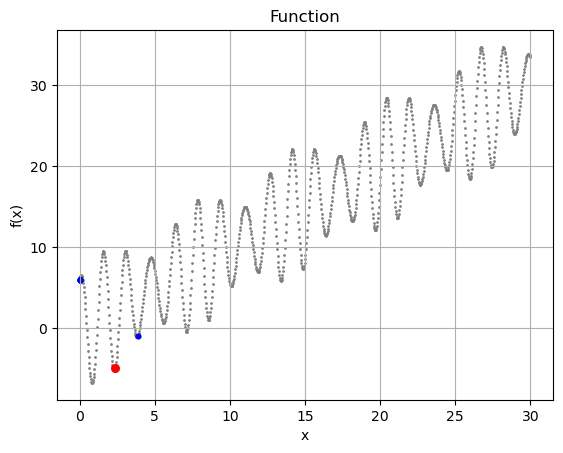

x before update: [0, 3.871587963205682, 0, 0, 0.009132877115083815]
7 round ===========================
v: [-1.4747047019373238, 0.506975731413071, 1.0016483077057752, -0.9944946868562656, 4.26720180284426]
x: [0, 4.378563694618753, 1.0016483077057752, 0, 4.276334679959344]
p_best: [0, 3.871587963205682, 1.0016483077057752, 0, 2.3773737526884364]
g_best: 2.3773737526884364


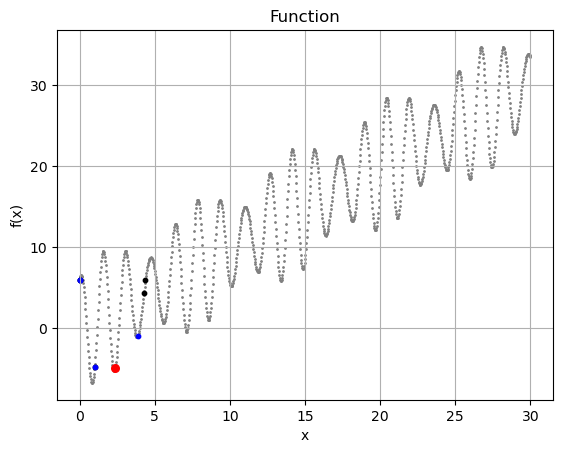

x before update: [0, 4.378563694618753, 1.0016483077057752, 0, 4.276334679959344]
8 round ===========================
v: [1.5048243588027512, -2.039112677369955, 1.6351991910080474, 1.677408562313078, -1.6153696764059693]
x: [1.5048243588027512, 2.3394510172487983, 2.6368474987138226, 1.677408562313078, 2.660965003553375]
p_best: [0, 2.3394510172487983, 1.0016483077057752, 0, 2.3773737526884364]
g_best: 2.3394510172487983


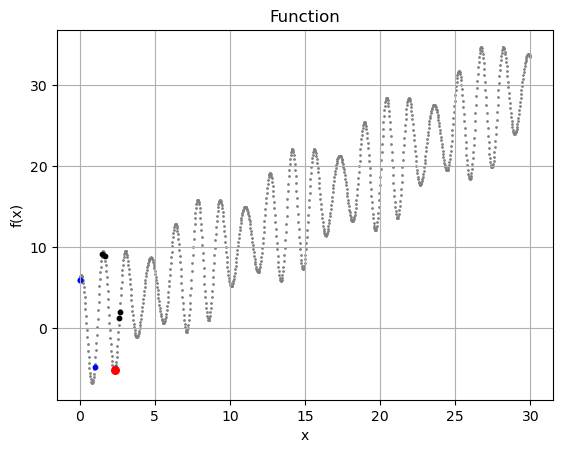

x before update: [1.5048243588027512, 2.3394510172487983, 2.6368474987138226, 1.677408562313078, 2.660965003553375]
9 round ===========================
v: [-0.02017814137456042, -0.7899940305927674, -1.1058264350330222, -0.2639670511755021, -1.1704220234015361]
x: [1.4846462174281907, 1.5494569866560308, 1.5310210636808004, 1.413441511137576, 1.4905429801518388]
p_best: [0, 2.3394510172487983, 1.0016483077057752, 0, 2.3773737526884364]
g_best: 2.3394510172487983


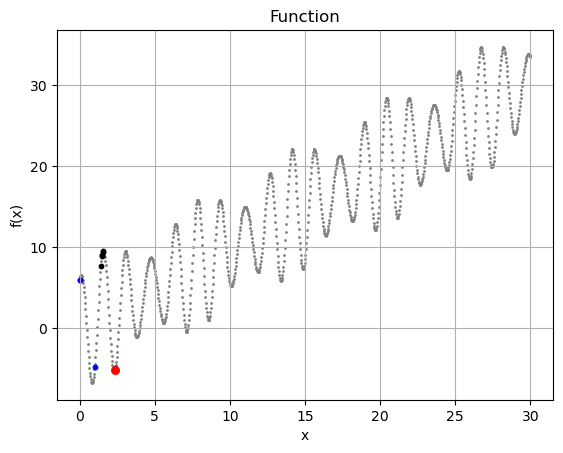

x before update: [1.4846462174281907, 1.5494569866560308, 1.5310210636808004, 1.413441511137576, 1.4905429801518388]
10 round ===========================
v: [-0.5738929587054238, -0.13929261388184466, -1.4202543412284112, -1.8165564068388176, -0.13176397938156037]
x: [0.9107532587227669, 1.4101643727741862, 0.11076672245238917, 0, 1.3587790007702785]
p_best: [0.9107532587227669, 2.3394510172487983, 1.0016483077057752, 0, 2.3773737526884364]
g_best: 0.9107532587227669


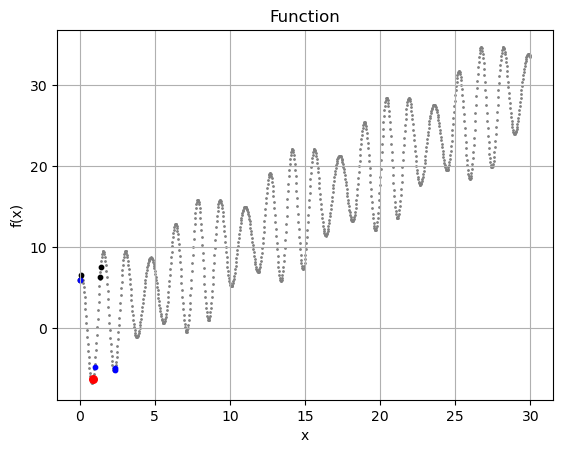

(0.91, -6.33)

In [27]:
import matplotlib.pyplot as plt
import math
import random as rd 


rd.seed(0)

#number of particles
particles = 5

# termination criterion
max_iterations = 10

# define the function
def function(x):
    return x + 2 * math.sin(5 * x) + 6 * math.cos(4 * x)

def show():   
    # Generate all x and f(x)
    x = [x*0.01 for x in range(0,3001,3) ] 
    y= [function(i) for i in x]

    # Visulize the function
    plt.scatter(x, y,s=1, c='gray')
    plt.xlabel('x')
    plt.ylabel('f(x)')
    plt.title('Function')
    plt.grid(True)

def pso2(particles,max_iterations):

    #parameters
    #set weights for 1.inertia  2.memory influence 3.social influence
    w = 0.6 # inertia weight
    cp = 0.9 # memory influence weight
    cg = 0.9 # social influence weight

    #create 4 lists for saving x(location), v(velocity), p_best(each particle's best location), p_best_value(each particle's best f(x) value)
    x=[] #location
    v=[] #velocity
    p_best=[] #each particle's best location
    p_best_value=[] #each particle's best f(x) value
    
    #set an initial value () to g_best and g_best_value
    g_best=0
    g_best_value=function(0)
    
    #set initial x(location), v(velocity), p_best(each particle's best location), p_best_value(each particle's best f(x) value)
    for i in range (particles):
        x.append(rd.uniform(0,30))
        v.append(rd.uniform(-2,2))
        p_best.append(x[i])  
        p_best_value.append(function(x[i]))
        
        #update g_best and g_best_value based on initial x
        
        if function(x[i]) > g_best_value:
            g_best = x[i]
            g_best_value = function(x[i])
    
    
    #POS function
    iteration=0    
    while iteration < max_iterations: #repeat max_iterations times 
        iteration+=1 
        
        print('x before update:',x)
        for i in range(particles):
            v[i] = (w**iteration)*v[i] + cp*(p_best[i]-x[i]) + cg*(g_best-x[i])
            x[i] = x[i]+v[i]
            
            if x[i]<0: 
                x[i]=0
            elif x[i]>30: 
                x[i]=30
                        
            temp = function(x[i])
            if temp > p_best_value[i]:
                p_best[i] = x[i]
                p_best_value[i] = temp
                
                if temp > g_best_value:
                    g_best = x[i]
                    g_best_value = temp
                    
        # Visulize the process       
        print(iteration,"round ===========================")
        print('v:',v)
        print('x:',x)
        print('p_best:',p_best)    
        print('g_best:',g_best)   
        
        show()
        plt.scatter(x, [function(i) for i in x],s=10, c='black')
        plt.scatter(p_best, [function(i) for i in p_best],s=10, c='blue')        
        plt.scatter(g_best, g_best_value,s=30, c='red')


        plt.show()    
    return (round(g_best,2), round(g_best_value,2))

def pso2min(particles,max_iterations):

    #parameters
    #set weights for 1.inertia  2.memory influence 3.social influence
    w = 0.9 # inertia weight
    cp = 0.9 # memory influence weight
    cg = 0.9 # social influence weight

    #create 4 lists for saving x(location), v(velocity), p_best(each particle's best location), p_best_value(each particle's best f(x) value)
    x=[] #location
    v=[] #velocity
    p_best=[] #each particle's best location
    p_best_value=[] #each particle's best f(x) value
    
    #set an initial value () to g_best and g_best_value
    g_best=0
    g_best_value=function(0)
    
    #set initial x(location), v(velocity), p_best(each particle's best location), p_best_value(each particle's best f(x) value)
    for i in range (particles):
        x.append(rd.uniform(0,30))
        v.append(rd.uniform(-2,2))
        p_best.append(x[i])  
        p_best_value.append(function(x[i]))
        
        #update g_best and g_best_value based on initial x
        
        if function(x[i]) > g_best_value:
            g_best = x[i]
            g_best_value = function(x[i])
    
    
    #POS function
    iteration=0    
    while iteration < max_iterations: #repeat max_iterations times 
        iteration+=1 
        
        print('x before update:',x)
        for i in range(particles):
            v[i] = (w**iteration)*v[i] + cp*(p_best[i]-x[i]) + cg*(g_best-x[i])
            x[i] = x[i]+v[i]
            
            if x[i]<0: 
                x[i]=0
            elif x[i]>30: 
                x[i]=30
                        
            temp = function(x[i])
            if temp < p_best_value[i]:
                p_best[i] = x[i]
                p_best_value[i] = temp
                
                if temp < g_best_value:
                    g_best = x[i]
                    g_best_value = temp
                    
        # Visulize the process       
        print(iteration,"round ===========================")
        print('v:',v)
        print('x:',x)
        print('p_best:',p_best)    
        print('g_best:',g_best)   
        
        show()
        plt.scatter(x, [function(i) for i in x],s=10, c='black')
        plt.scatter(p_best, [function(i) for i in p_best],s=10, c='blue')        
        plt.scatter(g_best, g_best_value,s=30, c='red')


        plt.show()    
    return (round(g_best,2), round(g_best_value,2))
                               
#pso2(particles,max_iterations)
pso2min(particles,max_iterations)

